In [8]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [9]:
# import data
numerical = pd.read_csv('numerical_cleaned.csv')
numerical.head()

,Sex,Year,Concentration,Hours spent socializing,Party Attendance,Conversation Starting,Correcting someone,Lottery Ticket Price,Borrowed Money,Reward,Email
0,1,2,Special Concentration,3,3,4,3,2,3,1,Jamesrose@college.harvard.edu
1,1,2,Mathematics,3,2,3,3,4,2,1,Hroatman@college.harvard.edu
2,2,3,Sociology,3,3,4,4,3,2,3,kathrynglover@college.harvard.edu
3,1,2,Statistics and Computer Science,3,5,4,2,2,3,5,ssadhuka@college.harvard.edu
4,2,3,OEB,3,5,4,2,5,2,1,Sbakaysa@college.harvard.edu


In [10]:
numerical['Year'].value_counts()

3    32
2    32
4    20
Name: Year, dtype: int64

### Totaling Extraversion and Risk

In [11]:
# total categories
numerical['extraversion_total'] = numerical['Hours spent socializing'] + numerical['Party Attendance'] + numerical['Conversation Starting'] + numerical['Correcting someone']
numerical['risk_total'] = numerical['Lottery Ticket Price'] + numerical['Borrowed Money'] + numerical['Reward']

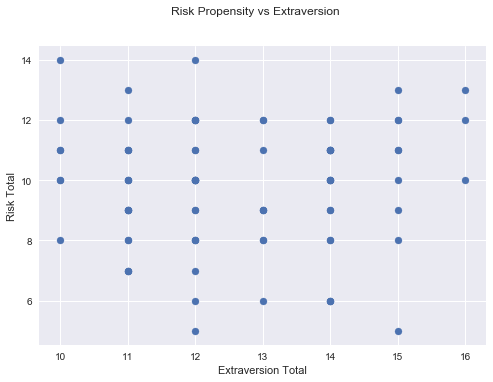

In [12]:
# scatter
plt.scatter(numerical['extraversion_total'], numerical['risk_total'])
plt.xlabel("Extraversion Total")
plt.ylabel('Risk Total')
plt.suptitle('Risk Propensity vs Extraversion')
plt.savefig('test.png', dpi=600)

plt.show()


In [13]:
# linear regression
# x = numerical['extraversion_total']
# y = numerical['risk_total']
# reg = LinearRegression().fit(x, y)

# reg.score(x,y)

In [14]:
columns = ['Hours spent socializing','Party Attendance','Conversation Starting',
           'Correcting someone','Lottery Ticket Price','Borrowed Money']
social_columns = ['Hours spent socializing','Party Attendance','Conversation Starting',
           'Correcting someone']
AFRP_columns = ['Lottery Ticket Price','Borrowed Money']
PFRP_columns = ['Reward']
# columns = ['Borrowed Money']

In [15]:
X = numerical[columns]
y = numerical[['Reward']]
# y = numerical[['Borrowed Money']]
# y = numerical[['Lottery Ticket Price']]

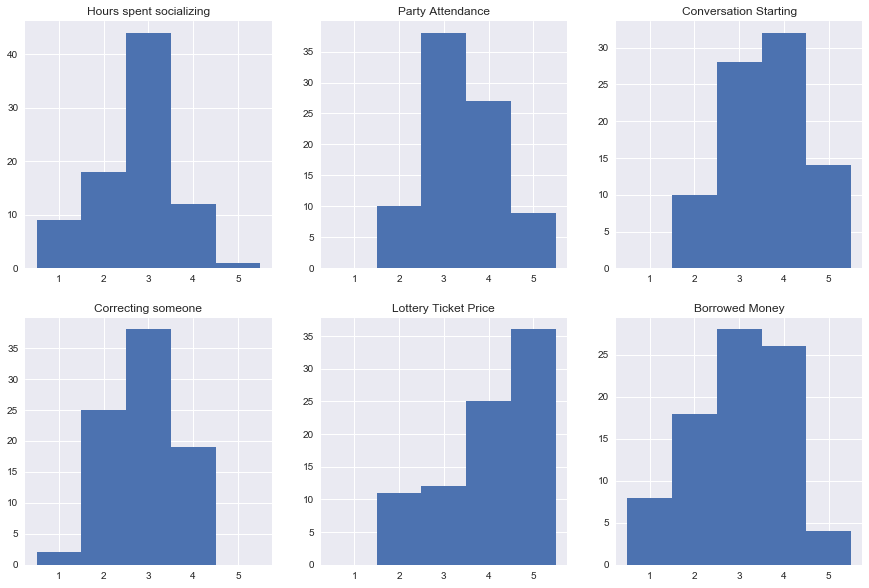

In [16]:
plt.rcParams['figure.figsize']=[15,10]
for i in np.linspace(1,len(columns),len(columns)):
    plt.subplot(2,3,i)
    plt.hist(numerical[columns[int(i)-1]], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
    plt.title(columns[int(i)-1])


(array([26., 11., 19., 13., 15.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

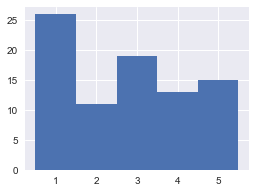

In [17]:
plt.rcParams['figure.figsize']=[4,3]
plt.hist(numerical['Reward'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

In [18]:
numerical['Reward'].value_counts()

1    26
3    19
5    15
4    13
2    11
Name: Reward, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

In [28]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

Coefficients: 
 [[ 0.11520561 -0.19471862]]
Variance score: 0.03382145489406341


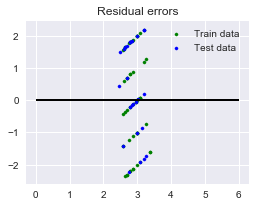

In [29]:
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 6, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

AFRP VS PFRP

In [70]:
X = numerical[AFRP_columns]
X = pd.DataFrame(X['Borrowed Money'] + X['Lottery Ticket Price'])
y = numerical[PFRP_columns]

Coefficients: 
 [[-0.03900848]]
Variance score: -0.032461679347274064


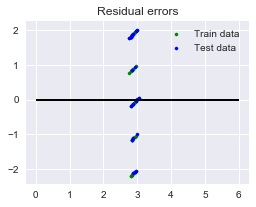

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 6, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

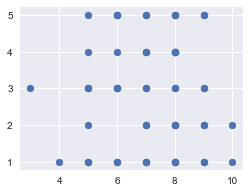

In [72]:
plt.scatter(X_train, y_train)
# plt.scatter(X_test, y_test, color = 'green')

AFRP VS Extraversion

In [73]:
X = numerical[social_columns]
X = pd.DataFrame(X['Conversation Starting'] + X['Correcting someone'] + X['Hours spent socializing']+X['Party Attendance'])
y = numerical[AFRP_columns]
y = pd.DataFrame(y['Borrowed Money'] + y['Lottery Ticket Price'])


Coefficients: 
 [[-0.1572327]]
Variance score: -0.12733358891425595


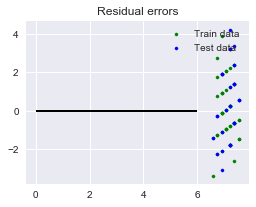

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 6, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

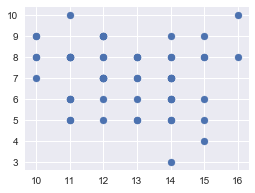

In [75]:
plt.scatter(X_train, y_train)
# plt.scatter(X_test, y_test, color = 'green')

Extraversion VS PFRP

In [65]:
X = numerical[social_columns]
X = pd.DataFrame(X['Conversation Starting'] + X['Correcting someone'] + X['Hours spent socializing']+X['Party Attendance'])
y = numerical[PFRP_columns]

Coefficients: 
 [[0.08427673]]
Variance score: -0.08315652070725044


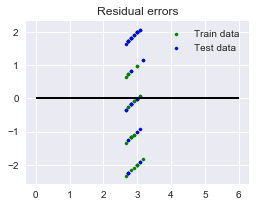

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 0, xmax = 6, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.show() 

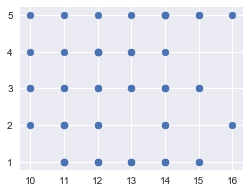

In [69]:
plt.scatter(X_train, y_train)
# plt.scatter(X_test, y_test, color = 'green')